### Igor de Jesus Santos - 119017594
### Matheus Isidoro - 119059596
### Saulo Roberto - 120128489

### Nosso grupo fez um algoritmo que recebe por meio de uma interface gráfica o caminho de uma rquivo .csv, a quantidade de clusters e os nomes das colunas da tabela que será usada para plotar o gráfico com a clusterização (lembrando que há a possibilidade de usar 1, 2 ou 3 dimensões, sendo definido pelo número de colunas passadas). Ao passar uma string vazia para a próxima coluna o gráfico é plotado.

### Intrução de uso: Executar o arquivo pyqt5.py
### Necessário bibliotecas numpy, matplotlib, pandas e pyqt5

In [1]:
import numpy as np
import matplotlib.pyplot as plt

K-means é um algoritmo de clusterização(agrupamento). É um algoritmo não supervisionado, ou seja, não precisa de supervisão humana para realizar os agrupamentos. Com base nos própios dados o algoritmo automaticamente classificará os dados mais semelhantes entre si a partir da menor distância à um centroide, que é um ponto inicialmente aleatório, mas que varia durante o algoritmo. Os únicos parâmetros necessários para o algoritmo é a quantidade de centroídes que queremos ter e os dados nos quais queremos aplicar o algoritmo.

O algoritmo se divide em 5 passos:

Passo 1: Definir aleatoriamente a posição dos centroides dentro do conjunto de dados.

Passo 2: Calcular para cada ponto o centroide de menor de distãncia

Passo 3: Associar cada ponto a um cluster(agrupamento) que será o cluster do centroide de menor distância

Passo 4: Reposicionar os centroides com base na media dos pontos associados a eles.

Passo 5: Repetir iterativamente os passos 2, 3 e 4 até obtermos a melhor posição dos centroides. Isso acontecerá quando os centroides não mais variarem de posição no passo 4.

In [64]:
def calc_dist(p1, p2, dim):
    """
    :param p1: primeiro ponto
    :param p2: segundo ponto
    :param dim: dimensão dos pontos
    :return: distância entre o primeiro e segundo ponto
    """
    if dim == 2:
        return ((p1[0] - p2[0]) ** 2 + (p1[1] - p2[1]) ** 2) ** (1 / 2)
    else:
        return ((p1[0] - p2[0]) ** 2 + (p1[1] - p2[1]) ** 2 + (p1[2] - p2[2]) ** 2) ** (1 / 2)

In [95]:
def k_means(n_clusters, points, dim):
    """
    :param n_clusters: número de clusters
    :param points: array dos pontos
    :param dim: dimensão dos pontos
    :return: dicionário onde a chave é o centróide e o valor associado os pontos próximos a ele
    """

    # quantidade de pontos
    n_points = points.shape[0]

    # Obtendo centroides aleatórios
    cluster_centers = set()
    while len(cluster_centers) != n_clusters:
        random_index = np.random.randint(0, n_points)
        random_point = points[random_index]
        cluster_centers.add(tuple(random_point))

    cluster_centers = tuple(cluster_centers)

    # centróides anteriores
    centers_before = None
    # centróides posteriores
    centers_after = []
    # Dicionário de conjunto de pontos por centroides
    centers = None

    while centers_before != centers_after:
        centers_before = centers_after
        centers_after = []
        
        centers = dict(zip(cluster_centers, [set() for _ in range(n_clusters)]))

        # Associa cada ponto ao seu centroide mais próximo
        for point in points:
            # centroide mais próximo
            min_center = None
            # distância até o centróide mais próximo
            min_dist = np.inf

            for center in cluster_centers:
                dist = calc_dist(point, center, dim)

                # atualiza centróide mais próximo
                if dist < min_dist:
                    min_center = center
                    min_dist = dist
            
            centers[min_center].add(tuple(point))

        # calcula os novos centróides
        for center in centers:
            ponto_medio = []

            # calcula média de cada eixo
            for i in range(dim):
                soma = sum([center_[i] for center_ in centers[center]])

                media = round(soma / len(centers[center]), 5)

                ponto_medio.append(media)

            # adiciona o novo centróide
            centers_after.append(tuple(ponto_medio))

        cluster_centers = tuple(centers_after)
    
    return centers

In [99]:
def plotar(points, centers, dim):
    # tamanho do plot
    plt.figure(figsize=(12, 12))

    # configura plot 3d caso seja array de 3 dimensão
    if dim == 3:
        ax = plt.axes(projection='3d')

    for center in centers:
        # array dos pontos do centróide
        array_points = np.array(list(centers[center]))

        # gerá plot dos pontos para cada centróide
        if dim == 2:
            plt.scatter(array_points[:, 0], array_points[:, 1])
        else:
            plt.scatter(array_points[:, 0], array_points[:, 1], array_points[:, 2])

    # plota os centróides
    centers_ = np.array(list(centers.keys()))
    if dim == 2:
        plt.scatter(centers_[:, 0], centers_[:, 1], marker="*", c="red")
    else:
        plt.scatter(centers_[:, 0], centers_[:, 1], centers_[:, 2],marker="*", c="red")
    
    plt.show()

In [128]:
QT_PONTOS = 100
LIMITE_PONTO = 100

## Visualizando com duas dimensões

In [129]:
array_2d = np.array([(np.random.randint(LIMITE_PONTO), np.random.randint(LIMITE_PONTO)) for _ in range(QT_PONTOS)])

In [130]:
result = k_means(2, array_2d, 2)

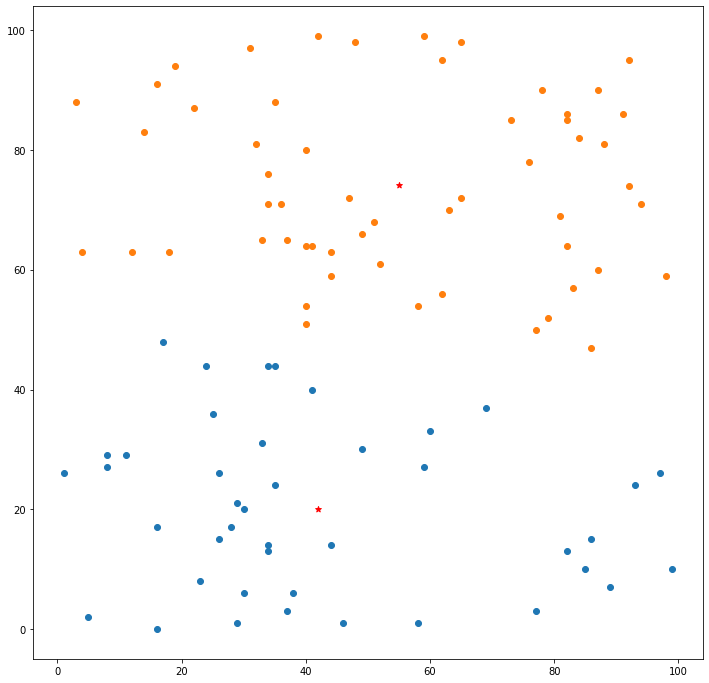

In [131]:
plotar(array_2d, result, 2)

## Visualizando com três dimensões

In [132]:
array_3d = np.array([(np.random.randint(LIMITE_PONTO), np.random.randint(LIMITE_PONTO), np.random.randint(LIMITE_PONTO)) for _ in range(QT_PONTOS)])

In [133]:
result = k_means(2, array_3d, 3)

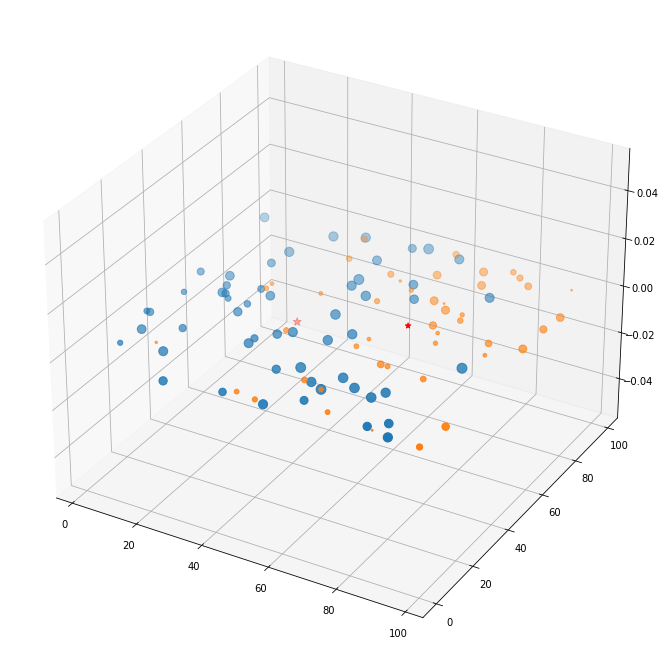

In [134]:
plotar(array_3d, result, 3)